In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math

In [2]:
df=load_iris()
X=pd.DataFrame(df.data,columns=df.feature_names)

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
Y=df.target

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X['target']=Y

In [17]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:

def calculate_entropy(data, target_column):
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        # Calculate the proportion of instances with the current value
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion)

    return entropy

entropy_outcome = calculate_entropy(X, 'target')
print(f"Entropy of the dataset: {entropy_outcome}")

Entropy of the dataset: 1.584962500721156


In [19]:
def calculate_entropy(data, target_column): # for each categorical variable
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        # Calculate the proportion of instances with the current value
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion) if proportion != 0 else 0

    return entropy
  
def calculate_information_gain(data, feature, target_column):

    # Calculate weighted average entropy for the feature
    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)

    # Calculate information gain
    information_gain = entropy_outcome - weighted_entropy

    return information_gain

In [21]:
for column in X.columns[:-1]:
    entropy = calculate_entropy(X, column)
    information_gain = calculate_information_gain(X, column, 'target')
    print(f"{column} - Entropy: {entropy:.3f}, Information Gain: {information_gain:.3f}")

sepal length (cm) - Entropy: 4.822, Information Gain: 0.877
sepal width (cm) - Entropy: 4.023, Information Gain: 0.517
petal length (cm) - Entropy: 5.035, Information Gain: 1.446
petal width (cm) - Entropy: 4.050, Information Gain: 1.436


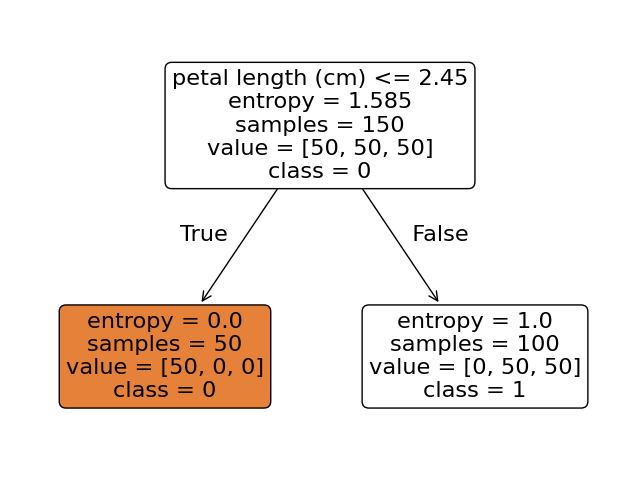

In [22]:
# Feature selection for the first step in making decision tree
selected_feature = 'petal length (cm)'

# Create a decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
x = X[[selected_feature]]
y = X['target']
clf.fit(x, y)

plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=[selected_feature], class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [25]:
def id3(data, target_column, features):
    if len(data[target_column].unique()) == 1:
        return data[target_column].iloc[0]

 
    if len(features) == 0:
        return data[target_column].mode().iloc[0]

    best_feature = max(features, key=lambda x: calculate_information_gain(data, x, target_column))

    tree = {best_feature: {}}

    features = [f for f in features if f != best_feature]

    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = id3(subset, target_column, features)

    return tree

In [26]:
id3_tree = id3(X, 'target', list(X.columns[:-1]))
print(id3_tree)

{'petal length (cm)': {1.4: 0, 1.3: 0, 1.5: 0, 1.7: 0, 1.6: 0, 1.1: 0, 1.2: 0, 1.0: 0, 1.9: 0, 4.7: 1, 4.5: {'sepal length (cm)': {6.4: 1, 5.7: 1, 5.6: 1, 6.2: 1, 6.0: 1, 5.4: 1, 4.9: 2}}, 4.9: {'sepal width (cm)': {3.1: 1, 2.5: 1, 2.8: 2, 2.7: 2, 3.0: 2}}, 4.0: 1, 4.6: 1, 3.3: 1, 3.9: 1, 3.5: 1, 4.2: 1, 3.6: 1, 4.4: 1, 4.1: 1, 4.8: {'sepal length (cm)': {5.9: 1, 6.8: 1, 6.2: 2, 6.0: 2}}, 4.3: 1, 5.0: {'sepal length (cm)': {6.7: 1, 5.7: 2, 6.0: 2, 6.3: 2}}, 3.8: 1, 3.7: 1, 5.1: {'sepal length (cm)': {6.0: 1, 5.8: 2, 6.5: 2, 6.3: 2, 6.9: 2, 5.9: 2}}, 3.0: 1, 6.0: 2, 5.9: 2, 5.6: 2, 5.8: 2, 6.6: 2, 6.3: 2, 6.1: 2, 5.3: 2, 5.5: 2, 6.7: 2, 6.9: 2, 5.7: 2, 6.4: 2, 5.4: 2, 5.2: 2}}
